# Visualization

### BUSI 520: Python for Business Research
### Kerry Back, JGSB, Rice University

These slides cover a few examples of Matplotlib and Seaborn plots.  See https://matplotlib.org/stable/gallery/index.html and https://seaborn.pydata.org/examples/index.html for many more.

Python reads the format in which to save figures from the file extension (though it can be overridden with format=).  For example, to save as a pdf,

    plt.savefig("filepath/name.pdf")

in functional method or 

    fig.savefig("filepath/name.pdf")

in object-oriented method (more later).  If you have a legend or annotation outside the plot area, use bbox_inches="tight" in the savefig command. 

### Basic Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set Style Parameters (optional)

In [2]:
sns.set_style('whitegrid')
colors = sns.color_palette()

import matplotlib as mpl
SLIDES = False
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['font.size'] = 10 + 2*SLIDES
mpl.rcParams['axes.titlesize'] = 14 + 2*SLIDES
mpl.rcParams['axes.labelsize'] = 12 + 2*SLIDES
mpl.rcParams['xtick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['ytick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.fontsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.title_fontsize'] = 0

In [3]:
# Example data

data = sns.load_dataset("tips")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Boxplots

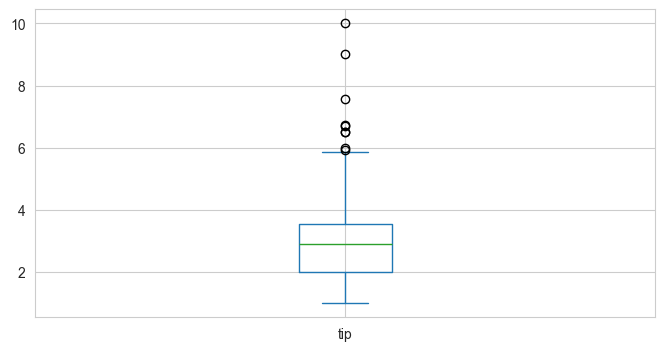

In [4]:
data.tip.plot(kind="box") 
plt.show()

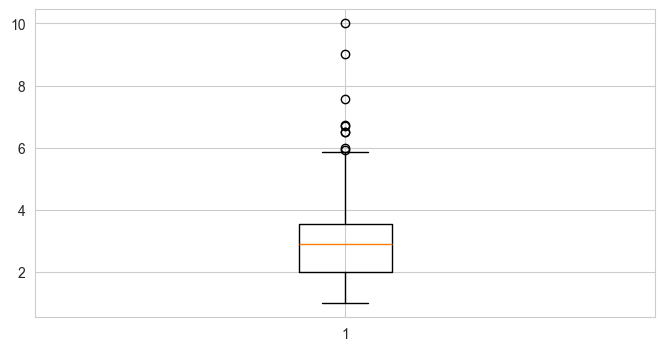

In [5]:
plt.boxplot(data.tip)
plt.show()

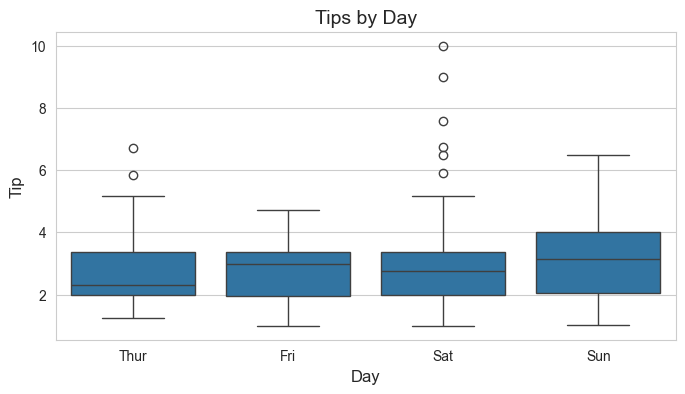

In [6]:
sns.boxplot(
    data=data,
    x = "day",
    y = "tip"
)
plt.title('Tips by Day')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

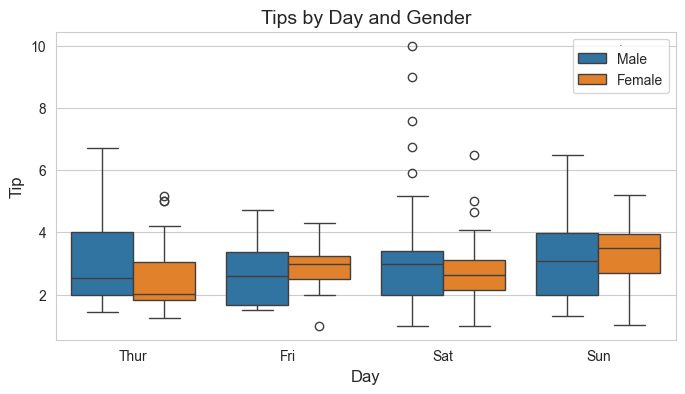

In [7]:
sns.boxplot(
    data=data,
    x = "day",
    y = "tip",
    hue = "sex"
)
plt.title('Tips by Day and Gender')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

### Histograms

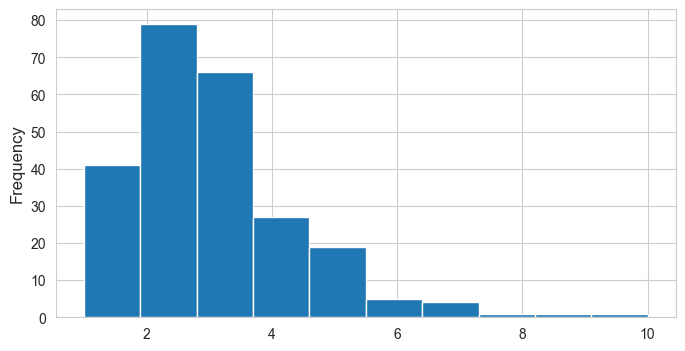

In [8]:
data.tip.plot(kind="hist") 
plt.show()

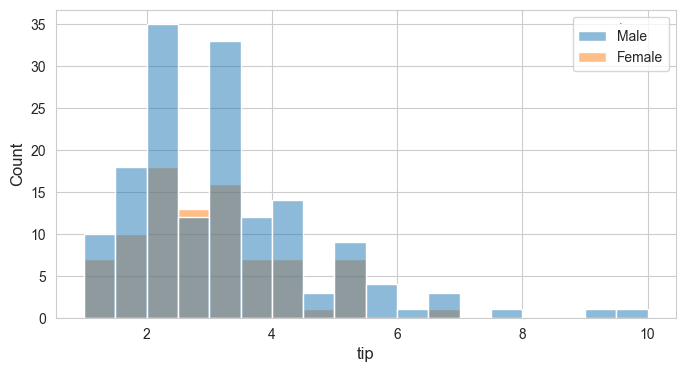

In [9]:
sns.histplot(
    data = data,
    x = "tip",
    hue = "sex"
)
plt.show()

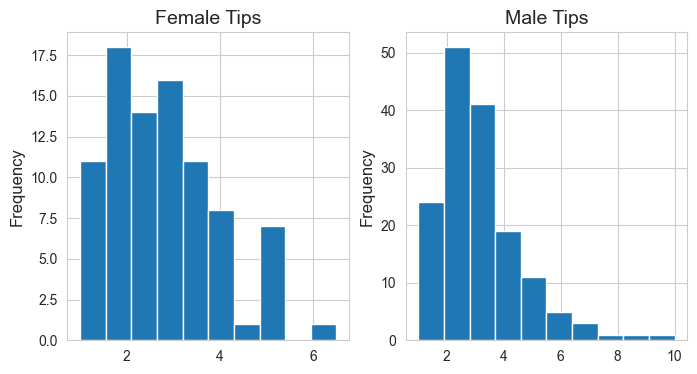

In [10]:
plt.subplot(1, 2, 1)
data[data.sex=="Female"].tip.plot(kind="hist")
plt.title("Female Tips")

plt.subplot(1, 2, 2)
data[data.sex=="Male"].tip.plot(kind="hist")
plt.title("Male Tips")

plt.show()

### Density Plots

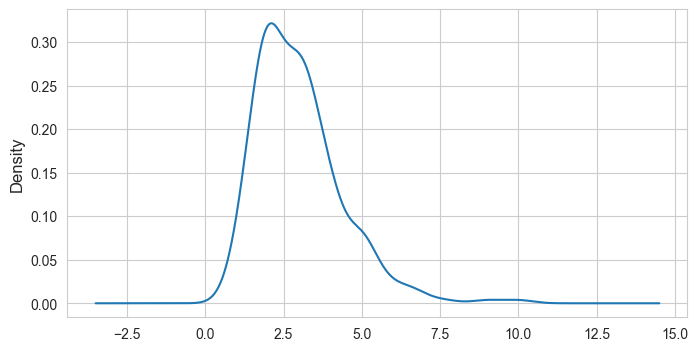

In [11]:
data.tip.plot(kind="kde")
plt.show()

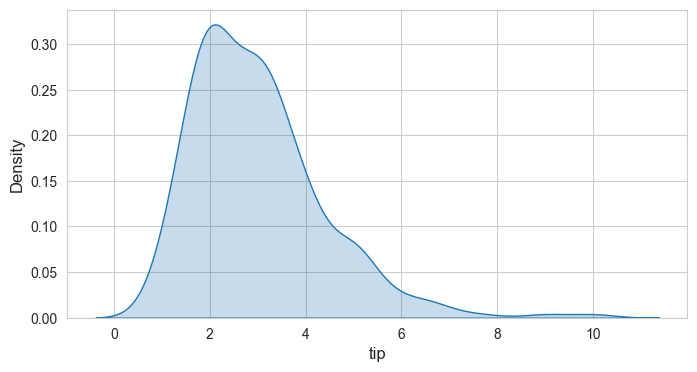

In [12]:
sns.kdeplot(data.tip, fill=True)
plt.show()

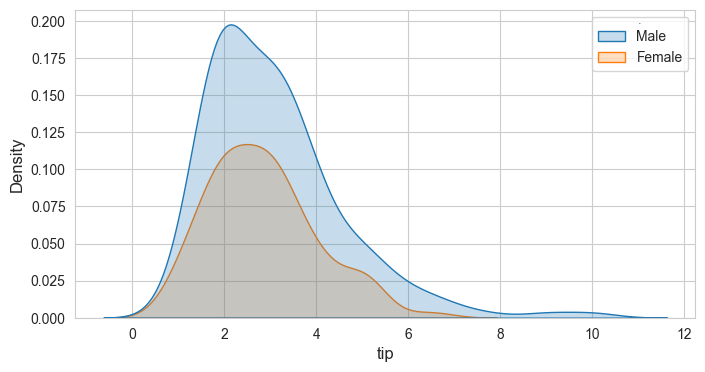

In [13]:
sns.kdeplot(
    data = data,
    x = "tip",
    hue = "sex",
    fill=True
)
plt.show()

### Scatter Plots

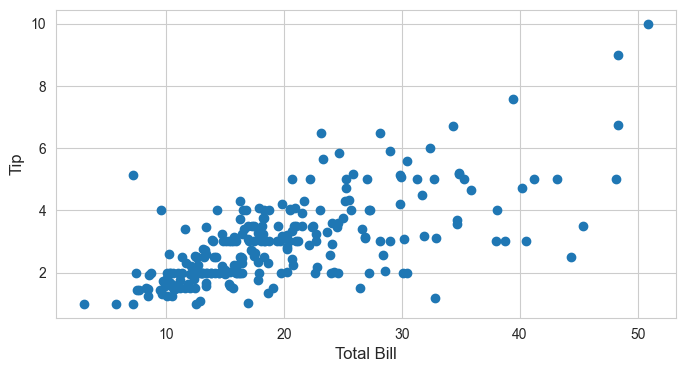

In [14]:
plt.scatter(data.total_bill, data.tip)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

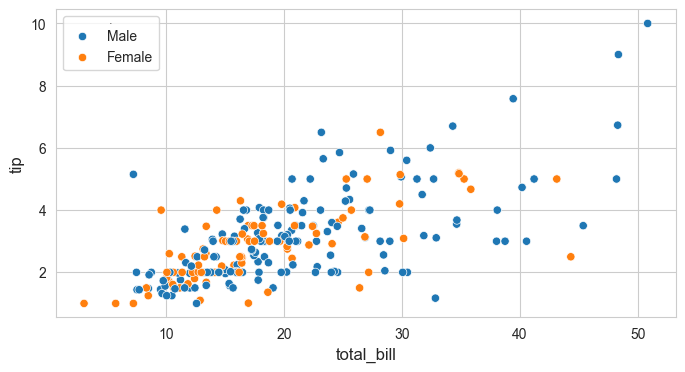

In [15]:
sns.scatterplot(
    data = data,
    x = "total_bill",
    y = "tip", 
    hue = "sex"
)
plt.show()

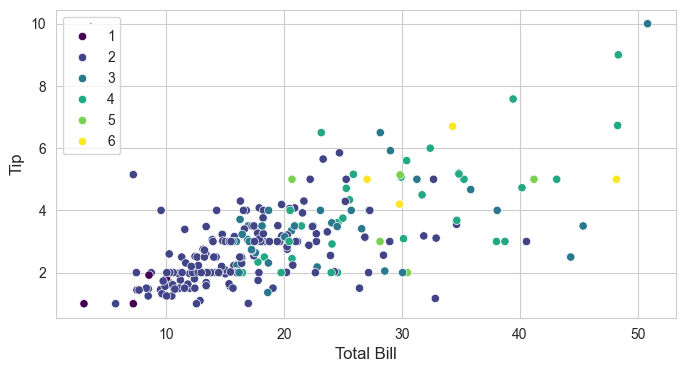

In [16]:
sns.scatterplot(
    data=data,
    x='total_bill', 
    y='tip', 
    hue='size', 
    palette='viridis'
)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

### Scatter Plots with Regression Lines

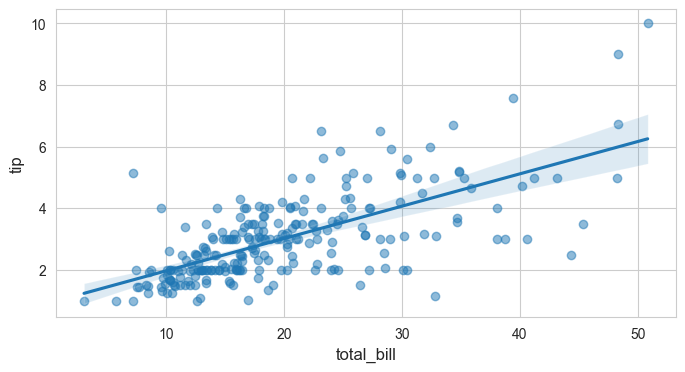

In [17]:
sns.regplot(
    data = data,
    x = "total_bill",
    y = "tip", 
    scatter_kws={'alpha':0.5}, 
)
plt.show()

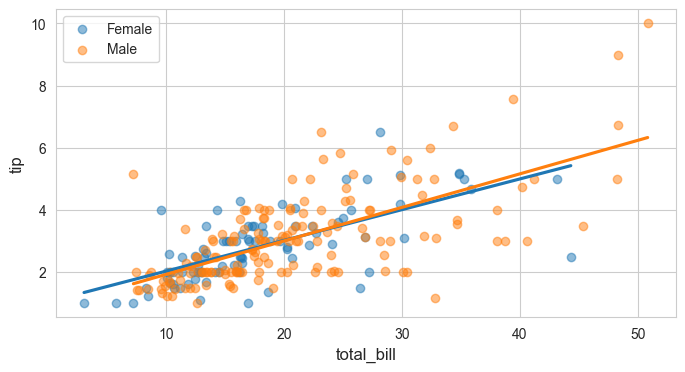

In [18]:
sns.regplot(
    data = data[data.sex=="Female"],
    x = "total_bill",
    y = "tip", 
    ci = None, 
    scatter_kws = {'alpha':0.5},
    label = "Female" 
)
sns.regplot(
    data = data[data.sex=="Male"],
    x = "total_bill",
    y = "tip", 
    ci = None, 
    scatter_kws = {'alpha':0.5},  
    label = "Male"
)
plt.legend()
plt.show()

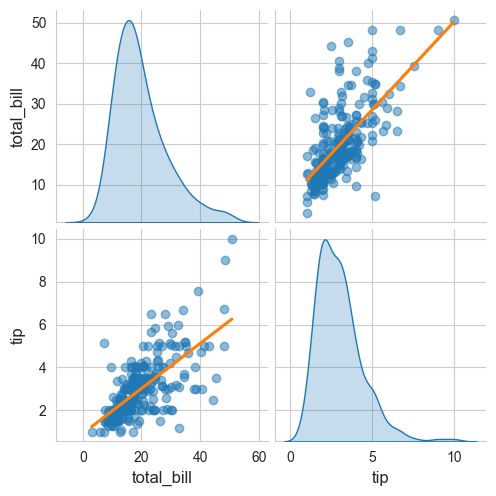

In [19]:
sns.pairplot(
    data[["total_bill", "tip"]], 
    kind='reg', 
    diag_kind='kde', 
    plot_kws={
        'ci': None,
        'scatter_kws': {'alpha': 0.5}, 
        'line_kws':{'color':colors[1]}
    }
)

plt.show()

### Some Plots for Large Data Sets

In [20]:
# generate some data

x = np.random.normal(size=10000)
y = x + np.random.normal(size=10000)
z = x + y + np.random.normal(size=10000)

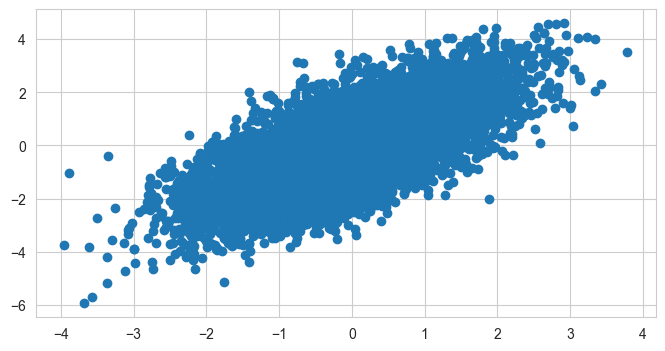

In [21]:
plt.scatter(x, y)
plt.show()

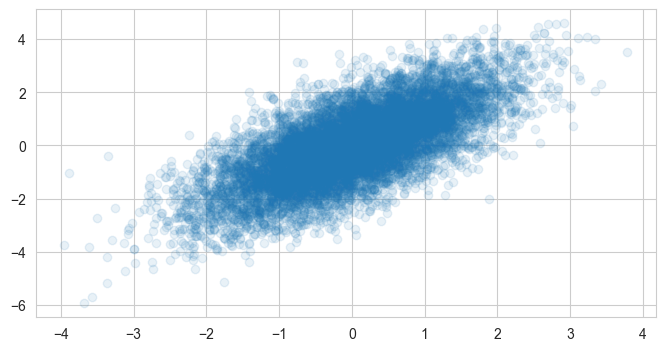

In [22]:
plt.scatter(x, y, alpha=0.1)
plt.show()

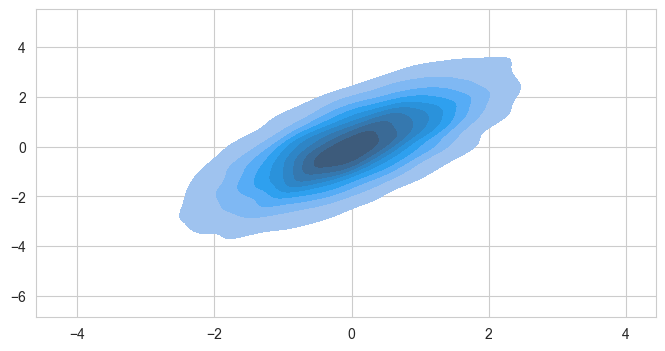

In [23]:
sns.kdeplot(
    x = x,
    y = y,
    fill = True,
)
plt.show()

In [24]:
# Create a 100 by 100 grid of x and y and compute the mean value of z in each cell
from scipy.stats import binned_statistic_2d

statistic, x_edge, y_edge, binnumber = binned_statistic_2d(
    x, y, z,
    statistic='mean', 
    bins=[100, 100]
)

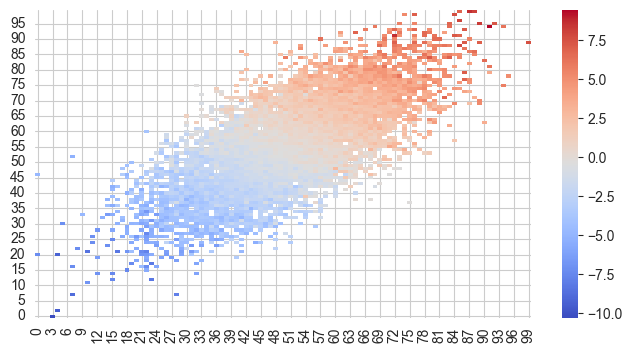

In [25]:
sns.heatmap(
    statistic.T, 
    cmap='coolwarm',
    cbar=True
)
plt.gca().invert_yaxis()
plt.show()

### Annotation

In [26]:
idx = data.tip.idxmax()
xcoord = data.total_bill[idx]
ycoord = data.tip[idx]

data.loc[idx]

total_bill     50.81
tip             10.0
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object

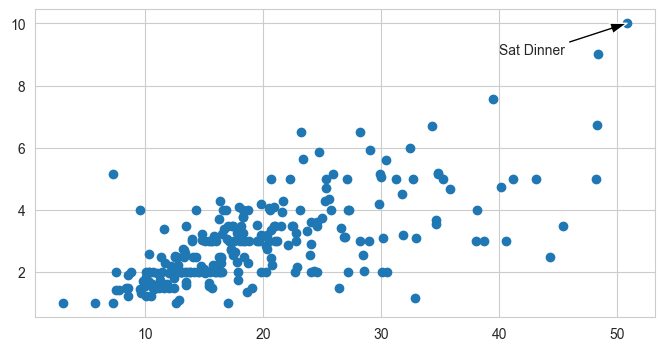

In [27]:
plt.scatter(data.total_bill, data.tip)
plt.annotate(
    data.day[idx] + " " + data.time[idx],
    xy=(xcoord, ycoord), 
    xytext=(40, 9),
    arrowprops=dict(facecolor='black', width=2, headwidth=8)
)
plt.show()

### 3-D Plotting

In [28]:
# create a function on a two-dimensional grid

a = np.linspace(0, 2, 100)
b = np.linspace(0, 2, 100)

A, B = np.meshgrid(a, b)
C = A**2 + B**2

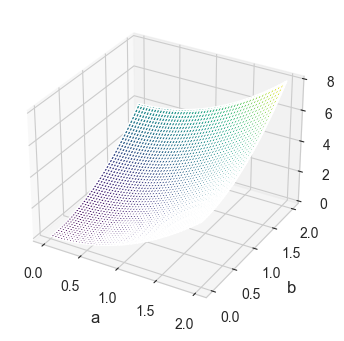

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, C, cmap='viridis')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
plt.show()

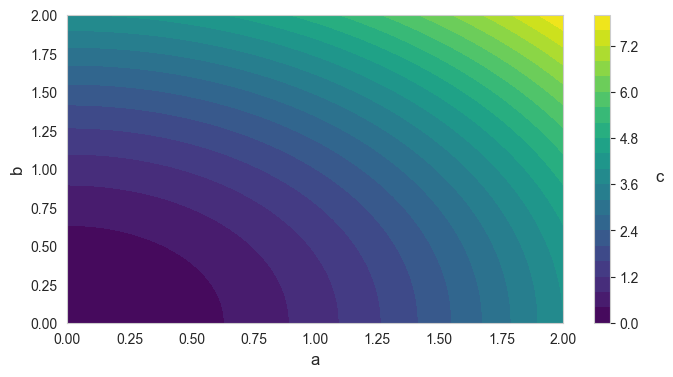

In [30]:
contour = plt.contourf(A, B, C, 20, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label('c', rotation=0, labelpad=15)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

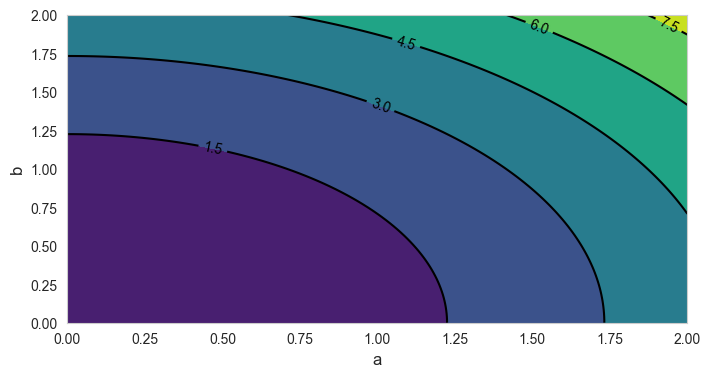

In [31]:
contour = plt.contourf(A, B, C, 6, cmap='viridis')
contour_lines = plt.contour(A, B, C, 6, colors='black')
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

### Filling Areas

In [32]:
# define two functions on a grid
x = np.linspace(0, 2, 100)
y1 = x
y2 = np.sqrt(x)

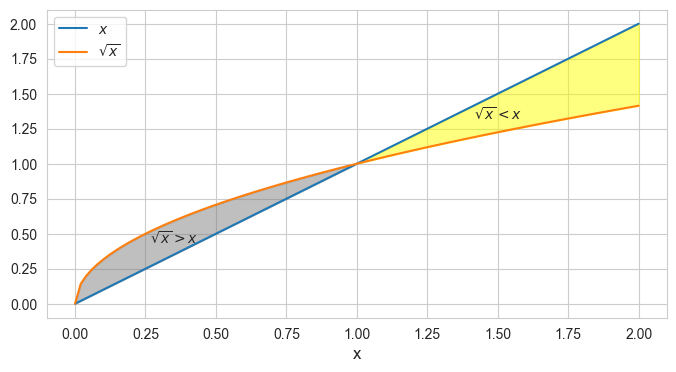

In [33]:
plt.plot(x, y1, label=r'$x$')
plt.plot(x, y2, label=r'$\sqrt{x}$')
plt.fill_between(x, y1, y2, 
    where=(x < 1), 
    color='gray', 
    alpha=0.5, 
)
plt.fill_between(x, y1, y2, 
    where=(x > 1), 
    color='yellow', 
    alpha=0.5, 
)

plt.text(
    0.35, 0.47, 
    r'$\sqrt{x} > x$', 
    horizontalalignment='center', 
    verticalalignment='center', 
)
plt.text(
    1.5, 1.35,
    r'$\sqrt{x} < x$', 
    horizontalalignment='center', 
    verticalalignment='center', 
 )

plt.xlabel('x')
plt.legend()
plt.show()

### Functional versus Object-Oriented

* Object oriented method provides more control
* Functional method is supposed to be simpler, but there is little difference in complexity.
* We've mostly used the functional method up to now.

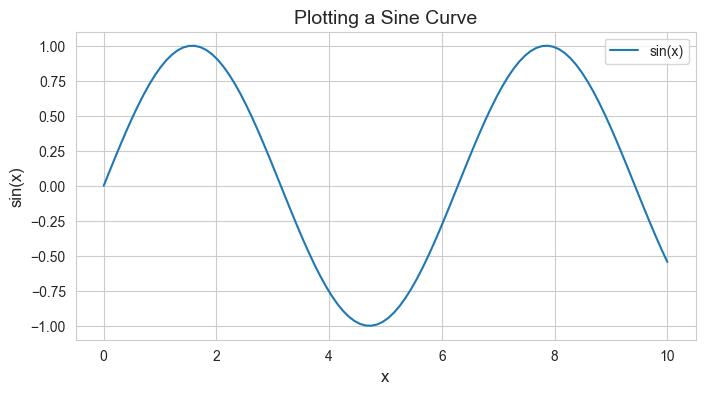

In [34]:

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Functional method
plt.plot(x, y, label='sin(x)')
plt.xlabel('x') 
plt.ylabel('sin(x)') 
plt.title('Plotting a Sine Curve')
plt.legend()
plt.show()

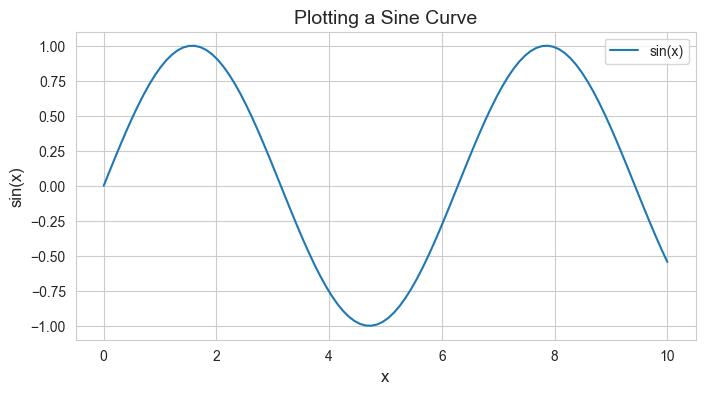

In [35]:
# Object-oriented method
fig, ax = plt.subplots()
ax.plot(x, y, label='sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_title('Plotting a Sine Curve')
ax.legend()
plt.show()